# The impact of early admission tickets on bar revenue

Understanding what drives bar revenue during events is essential for optimizing both guest experience and business performance. One potential factor influencing revenue is the timing of guest arrival. Specifically, guests who arrive early may have more time to purchase drinks, engage with the venue, and ultimately contribute more to overall sales.

This analysis investigates the relationship between early admission ticket holders and bar spending behavior. By analyzing visitor arrival patterns and comparing them with bar revenue data, we aim to answer the following question:

    Do earlier arrivals lead to higher bar revenue?

The results can help inform ticketing strategy, event scheduling, and promotional efforts aimed at maximizing on-site sales.

## A Behavioral Perspective

To explore whether early guest arrivals contribute to increased spending, we analyzed bar revenue on days with high versus low early arrival ratios. The underlying idea is simple: guests who enter earlier may have more idle time to consume drinks before the event peaks, potentially boosting bar sales.

To test this, we split event days into two categories:

    Many early arrivals (above-median early arrival ratio)

    Few early arrivals (below-median)

We then calculated the average total bar revenue for each group and visualized the results using a bar plot.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=agg_df,
    x="early_group",
    y="total_bar_spend",
    ci="sd",  # use "sd" for standard deviation, or "se" for standard error
    palette=["#a8dadc", "#f4a9ae"]
)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"€{height:,.0f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Average Bar Revenue on Days with Many vs Few Early Arrivals", fontsize=13)
plt.xlabel("Group (based on share of early arrivals)")
plt.ylabel("Average Total Bar Revenue (€)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'agg_df' is not defined

<Figure size 800x500 with 0 Axes>

The chart displays the average total bar revenue on days with a high versus low share of early arrivals.

    On days with many early arrivals, average bar revenue was approximately €20,895.

    On days with fewer early arrivals, average bar revenue was approximately €16,262.

    This represents a difference of over €4,600.

To assess whether this difference is statistically significant, an independent t-test was conducted. The result (p = 0.0211) indicates a statistically significant difference at the 5% level. This means it is unlikely that the observed difference occurred by chance.

These findings suggest that a higher proportion of early-arriving guests is associated with increased bar revenue. This insight may support strategic decisions around early access ticketing, guest flow management, and event scheduling aimed at maximizing on-site revenue.

### Evaluating Early Ticket Pricing and Sales Distribution

Having established that a higher share of early arrivals is associated with increased bar revenue, we now examine the current pricing and sales structure of early admission tickets. The objective is to understand how these tickets are priced and how frequently they are sold compared to regular tickets.

This analysis provides the foundation for evaluating the potential impact of adjusting early ticket pricing, either to increase volume or to incentivize regular ticket holders to switch. Specifically, we examine the number of tickets sold per pricing tier and calculate the average price per ticket type for both early and regular categories.


In [14]:
early_tickets_df = tickets_v1_df[tickets_v1_df["ticket_category"] == "early"].copy()
regular_tickets_df = tickets_v1_df[tickets_v1_df["ticket_category"] == "regular"].copy()

early_ticket_summary = early_tickets_df.groupby("ticket_name").agg(
    ticket_count=("ticket_name", "count"),
    average_price=("total_price", "mean")
).reset_index()

regular_ticket_summary = regular_tickets_df.groupby("ticket_name").agg(
    ticket_count=("ticket_name", "count"),
    average_price=("total_price", "mean")
).reset_index()

print("Early Ticket Summary:")
display(early_ticket_summary)

print("\nRegular Ticket Summary:")
display(regular_ticket_summary)

Early Ticket Summary:


,ticket_name,ticket_count,average_price
0,Access by day // Early admission (enter betwee...,150,6.250000
1,Access by night // Early admission (enter betw...,150,6.250000
2,Early Access Ticket (before 16:00),427,9.750000
3,Early Admission (enter before 00:30),100,10.750000
4,Early Admission (enter before 16.00),250,10.000000
5,Early Admission (enter before 17:00),400,8.359375
6,Early Entrance (entrance before 16:00),1,8.750000
7,Early Entry (before 16:00),108,10.750000
8,Early admission (enter before 00:00),432,8.821759
9,Early admission (enter before 00:30),50,10.750000



Regular Ticket Summary:


,ticket_name,ticket_count,average_price
0,Access by day & night // Regular (enter betwee...,556,12.250000
1,Access by day // Regular (enter between 14:00 ...,226,8.750000
2,Access by night // Regular (enter between 23:0...,800,7.500000
3,General,240,7.500000
4,General admission (enter before 03:00),1869,12.046950
5,Lofi by Day & Night // Regular,620,8.750000
6,Lofi by Night // Regular (entrance from 22:00),150,7.500000
7,Phase 1 - Regular Entrance,9,10.000000
8,Phase 2 - Regular Entrance,3,11.250000
9,Phase 3 - Regular Entrance,4,12.500000


### Estimating Conversion Impact Based on Price Differences

With the current pricing data available, we observe a clear difference between the average prices of early admission and regular tickets. On average, early tickets are priced at approximately €8.21, while regular tickets average around €10.22. This results in a price difference of €2.01.

Based on this difference, we estimate the potential behavioral response of regular ticket buyers. Research in consumer pricing suggests that even modest price differences can influence purchasing decisions, especially when the alternative offers the same or similar value (e.g., access to the same event).

To model this effect, we make a conservative assumption:  
**15% of regular ticket buyers could be incentivized to switch to an early admission ticket.**

This conversion rate assumption serves as a baseline for estimating potential shifts in ticket sales behavior and its resulting financial impact. It reflects general sensitivity to price incentives while acknowledging that other factors (such as convenience or perceived exclusivity) may also influence decision-making.

The next step involves simulating the effects of such a shift under different pricing scenarios.


In [15]:
avg_early_price = early_ticket_summary['average_price'].mean()
avg_regular_price = regular_ticket_summary['average_price'].mean()

price_difference = avg_regular_price - avg_early_price

print(f"Average early ticket price: €{avg_early_price:.2f}")
print(f"Average regular ticket price: €{avg_regular_price:.2f}")
print(f"Price difference (Regular - Early): €{price_difference:.2f}")

# Assumption for conversion rate:
# Based on the price difference, we assume a certain percentage of regular ticket buyers
# would be incentivized to switch to a cheaper early admission ticket.
# A larger price difference is assumed to lead to a higher conversion rate.
# Let's assume a conversion rate of 15% of regular ticket buyers would switch
# given the current average price difference. This is a reasonable starting point
# for estimation, assuming some price sensitivity among customers.

conversion_rate_assumption = 0.15

print(f"\nAssumption:")
print(f"We assume that {conversion_rate_assumption:.0%} of regular ticket buyers")
print(f"would be incentivized to purchase a cheaper early admission ticket.")
print(f"This assumption is based on the observed average price difference and general consumer behavior regarding price incentives.")

Average early ticket price: €8.21
Average regular ticket price: €10.22
Price difference (Regular - Early): €2.01

Assumption:
We assume that 15% of regular ticket buyers
would be incentivized to purchase a cheaper early admission ticket.
This assumption is based on the observed average price difference and general consumer behavior regarding price incentives.


In [16]:
# Calculate the current average early ticket price from the early_ticket_summary_v1 DataFrame
# Use early_ticket_summary_v1 as it was calculated in the last relevant step that had access to price information.
current_avg_early_price = early_ticket_summary_v1['average_price'].mean()
current_avg_regular_price = regular_ticket_summary['average_price'].mean() # Assuming regular_ticket_summary is still available

# Define a hypothetical cheaper price for early admission tickets.
# This should be lower than the current average early ticket price and potentially attractive to regular buyers.
# Let's propose a 20% reduction from the current average early ticket price as the simulated price.
simulated_early_price = current_avg_early_price * 0.80  # 20% reduction

print(f"Current average early ticket price: €{current_avg_early_price:.2f}")
print(f"Current average regular ticket price: €{current_avg_regular_price:.2f}")
print(f"Hypothetical cheaper early admission ticket price: €{simulated_early_price:.2f}")

Current average early ticket price: €8.21
Current average regular ticket price: €10.22
Hypothetical cheaper early admission ticket price: €6.57


### Simulating the Net Revenue Impact of Early Ticket Pricing Strategies

To assess whether adjusting early ticket prices could lead to a net financial benefit, we simulate the potential revenue impact of switching a portion of regular ticket buyers to a cheaper early ticket alternative. This analysis incorporates both potential gains from increased bar spending and potential losses from reduced ticket income.

In the previous step, we assumed a hypothetical early ticket price of €6.57 (a 20% discount from the current average). Based on this, we estimated the number of regular buyers likely to switch and calculated the net revenue effect by subtracting lost ticket revenue from estimated bar revenue gains. The result showed a positive net impact of approximately €3,778.

While this scenario was based on a fixed assumption of 15% conversion, it is important to understand how sensitive the outcome is to this parameter. We therefore expand the analysis by simulating a **range of conversion rates**, from 0% to 30%, in 1% increments. For each level, we compute:

- The number of regular buyers expected to switch
- The ticket revenue lost due to the price difference
- The estimated bar revenue gained from those new early attendees
- The resulting **net revenue impact**

In [19]:
# 1. Calculate the estimated number of new early attendees.
# estimated_switching_buyers was calculated in a previous step.
# conversion_rate_assumption was defined in a previous step.
estimated_new_early_attendees = estimated_switching_buyers * conversion_rate_assumption

# 2. Calculate the potential gained bar revenue.
# avg_bar_spend_per_early_attendee was calculated in the previous step.
potential_gained_bar_revenue = estimated_new_early_attendees * avg_bar_spend_per_early_attendee

# 3. Print the estimated number of new early attendees and the potential gained bar revenue.
print(f"Estimated number of new early attendees: {estimated_new_early_attendees:.0f}")
print(f"Potential gained bar revenue from new early attendees: €{potential_gained_bar_revenue:,.2f}")

Estimated number of new early attendees: 524
Potential gained bar revenue from new early attendees: €39,258.73


In [20]:
# Calculate the net impact on overall revenue
net_revenue_impact = potential_gained_bar_revenue - potential_lost_revenue

# Print the calculated net revenue impact
print(f"Net revenue impact of offering cheaper early admission tickets: €{net_revenue_impact:,.2f}")

Net revenue impact of offering cheaper early admission tickets: €3,578.13


This allows us to visualize the trade-off between ticket discounting and overall profitability under different behavioral responses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a range of hypothetical conversion rates
conversion_rates = np.arange(0, 0.31, 0.01) # From 0% to 30% in 1% increments

# Initialize lists to store results
net_revenue_impacts = []

# Get necessary pre-calculated values
total_regular_tickets = regular_ticket_summary["ticket_count"].sum()
current_avg_regular_price = regular_ticket_summary['average_price'].mean()
avg_bar_spend_per_early_attendee = early_attendees_bar_spend.groupby("order_id")["total_price"].sum().mean()
original_conversion_rate_assumption = 0.15 # The conversion rate used to estimate number of early attendees

# 2-6. Calculate net revenue impact for each conversion rate
for conversion_rate in conversion_rates:
    estimated_switching_buyers = total_regular_tickets * conversion_rate
    potential_lost_regular_ticket_revenue = estimated_switching_buyers * current_avg_regular_price
    # The estimated number of new early attendees is based on the *original* conversion rate assumption
    # applied to the *new* number of switching buyers at the hypothetical conversion rate.
    estimated_new_early_attendees = estimated_switching_buyers * original_conversion_rate_assumption
    potential_gained_bar_revenue = estimated_new_early_attendees * avg_bar_spend_per_early_attendee
    net_revenue_impact = potential_gained_bar_revenue - potential_lost_regular_ticket_revenue
    net_revenue_impacts.append(net_revenue_impact)

# 7. Create a pandas DataFrame to store the conversion rates and their corresponding net revenue impacts.
impact_df = pd.DataFrame({
    "conversion_rate": conversion_rates,
    "net_revenue_impact": net_revenue_impacts
})

# 8-10. Create and display a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=impact_df, x="conversion_rate", y="net_revenue_impact")
plt.title("Net Revenue Impact vs. Conversion Rate of Regular Buyers to Early Tickets")
plt.xlabel("Conversion Rate of Regular Buyers to Early Tickets")
plt.ylabel("Net Revenue Impact (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'regular_ticket_summary' is not defined

,price_reduction_percentage,simulated_early_price,estimated_switching_buyers,potential_lost_ticket_revenue,potential_gained_bar_revenue,net_revenue_impact
0,0,10.220446,0.00,0.000000,0.000000,0.000000
1,1,10.118241,232.74,2378.706509,17448.323479,15069.616971
2,2,10.016037,465.48,4757.413017,34896.646958,30139.233941
3,3,9.913832,698.22,7136.119526,52344.970437,45208.850912
4,4,9.811628,930.96,9514.826035,69793.293917,60278.467882


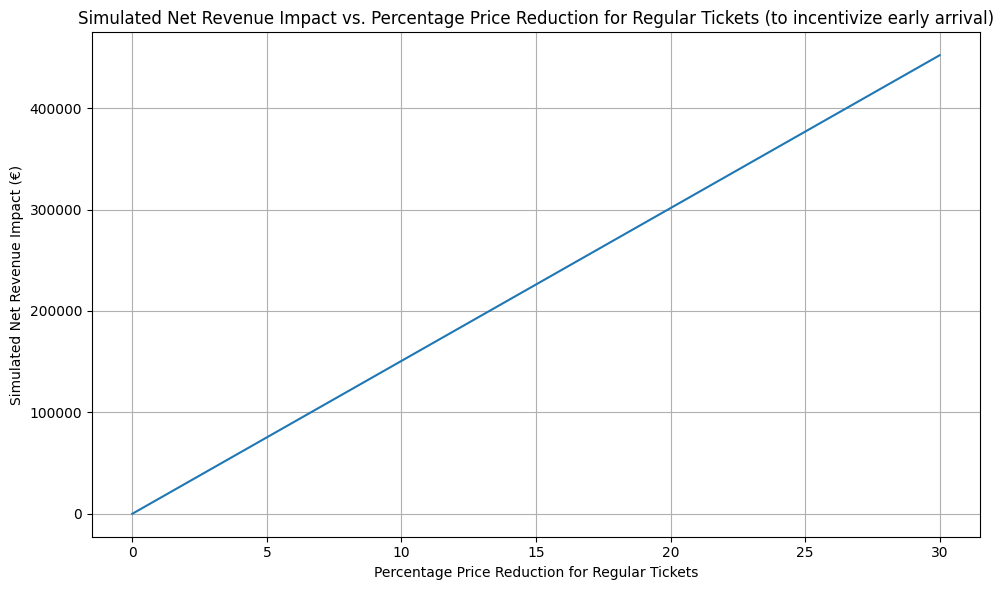

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume a range of price reductions for regular tickets to incentivize early arrival
# Let's simulate price reductions from 0% to 30% in steps of 1%.
price_reductions_percentage = np.arange(0, 31, 1)
price_reductions = price_reductions_percentage / 100.0

# Assume a relationship between price reduction and conversion rate of regular buyers to early tickets.
# This is a key assumption and can be adjusted.
# Let's assume a linear relationship for simplicity to start:
# conversion_rate = base_conversion_rate + (price_reduction_percentage / max_price_reduction_percentage) * additional_conversion_gain
# We can assume a base conversion rate (e.g., a small percentage of regular buyers who might switch even with a small price difference)
# and an additional gain based on the price reduction.

# Let's use the previously assumed conversion_rate_assumption (0.15) as a point of reference,
# assuming it corresponds to the current average price difference.
# We'll simplify this for the simulation by assuming the conversion rate
# is directly proportional to the price reduction percentage.

# Example assumption: a 30% price reduction leads to a 30% conversion rate.
# We can explore different sensitivities later if needed.
# For now, let's assume conversion_rate = price_reduction

# Get necessary pre-calculated values from previous steps
if 'regular_ticket_summary' in locals() and regular_ticket_summary is not None:
    total_regular_tickets = regular_ticket_summary["ticket_count"].sum()
    current_avg_regular_price = regular_ticket_summary['average_price'].mean()
else:
    print("Regular ticket summary not found. Please ensure previous steps were run successfully.")
    total_regular_tickets = 0
    current_avg_regular_price = 0

if 'early_attendees_bar_spend' in locals() and early_attendees_bar_spend is not None:
     if not early_attendees_bar_spend.empty:
        avg_bar_spend_per_early_attendee = early_attendees_bar_spend.groupby("order_id")["total_price"].sum().mean()
     else:
        print("No data for early attendees bar spend.")
        avg_bar_spend_per_early_attendee = 0
else:
    print("Early attendees bar spend data not found. Please ensure previous steps were run successfully.")
    avg_bar_spend_per_early_attendee = 0


# Initialize lists to store results
simulated_early_prices = []
estimated_switching_buyers = []
potential_lost_ticket_revenues = []
potential_gained_bar_revenues = []
net_revenue_impacts_simulated = []

# Simulate scenarios for each price reduction
for pr in price_reductions:
    # Calculate the simulated early ticket price
    simulated_early_price = current_avg_regular_price * (1 - pr)
    simulated_early_prices.append(simulated_early_price)

    # Assume conversion rate is equal to the price reduction percentage (as a decimal)
    # This is a simple assumption and can be refined.
    conversion_rate = pr

    # Estimate the number of regular ticket buyers who switch
    switching_buyers = total_regular_tickets * conversion_rate
    estimated_switching_buyers.append(switching_buyers)

    # Calculate potential lost regular ticket revenue
    # This is the revenue lost from the switching buyers who would have paid the full regular price
    lost_revenue = switching_buyers * current_avg_regular_price
    potential_lost_ticket_revenues.append(lost_revenue)

    # Calculate potential gained bar revenue from new early attendees
    # Assuming new early attendees spend the same at the bar as current early attendees
    gained_bar_revenue = switching_buyers * avg_bar_spend_per_early_attendee
    potential_gained_bar_revenues.append(gained_bar_revenue)


    # Calculate the net revenue impact
    net_impact = gained_bar_revenue - lost_revenue
    net_revenue_impacts_simulated.append(net_impact)

# Create a pandas DataFrame to store the simulation results
simulation_impact_df = pd.DataFrame({
    "price_reduction_percentage": price_reductions_percentage,
    "simulated_early_price": simulated_early_prices,
    "estimated_switching_buyers": estimated_switching_buyers,
    "potential_lost_ticket_revenue": potential_lost_ticket_revenues,
    "potential_gained_bar_revenue": potential_gained_bar_revenues,
    "net_revenue_impact": net_revenue_impacts_simulated
})

display(simulation_impact_df.head())

# Create the visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=simulation_impact_df, x="price_reduction_percentage", y="net_revenue_impact")
plt.title("Simulated Net Revenue Impact vs. Percentage Price Reduction for Regular Tickets (to incentivize early arrival)")
plt.xlabel("Percentage Price Reduction for Regular Tickets")
plt.ylabel("Simulated Net Revenue Impact (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

By merging the dataframes based on transaction and scan dates, we can link bar purchases to individual attendees and their ticket categories, allowing us to analyze spending habits of early arrivers compared to others.

## Aggregating Insights: Daily Summaries of Attendance and Spending

To understand the overall impact of early admissions on a given event day, we need to aggregate the data. This involves summarizing the total number of attendees, the count of early attendees, and the total bar revenue for each day.

## Identifying Trends: Analyzing the Ratio of Early Arrivals

To further analyze the impact of early admissions, we'll look at the proportion of early visitors relative to the total number of attendees each day. This allows us to categorize days based on whether they had a high or low ratio of early arrivers.

## Visualizing the Impact: Bar Revenue by Early Arrival Group

A clear visualization can help us understand the relationship between early arrivals and bar revenue. We'll create a bar plot to compare the average total bar spend for days with many versus few early arrivals.

We'll generate a bar plot showing the average total bar revenue for the two groups of days: "many early arrivals" and "few early arrivals". This visual comparison will highlight the difference in spending between these groups.

## Initial Insights: The Impact of Early Arrivals on Bar Revenue

Based on our initial analysis, we've found a statistically significant difference in bar revenue between days with a higher proportion of early arrivals and those with a lower proportion. This suggests that encouraging early attendance could indeed have a positive impact on bar sales.

We'll analyze the sales volume and average price for both early and regular tickets based on our ticket data. This provides us with the baseline figures needed to estimate potential revenue changes under different scenarios.

## Visualizing the Possibilities: Revenue Impact Across Scenarios

To fully grasp the potential outcomes of this strategy under different assumptions about how many regular buyers would switch, we'll visualize the net revenue impact across a range of conversion rates.

We'll simulate the net revenue impact for a spectrum of potential conversion rates of regular ticket buyers to early admission. Plotting these results will show us how sensitive the overall profitability is to the percentage of regular buyers who are incentivized to arrive early.

## Wrapping Up: Key Findings and Future Considerations

We've analyzed the potential financial impact of incentivizing regular ticket buyers to switch to cheaper early admission tickets. Our analysis involved estimating lost ticket revenue, gained bar revenue, and calculating the net effect under certain assumptions. The visualizations help illustrate the potential trade-offs and the sensitivity of the outcome to the conversion rate.

These findings provide a foundation for making informed decisions about pricing strategies and event planning to potentially increase overall revenue by influencing attendee arrival times. Further analysis could refine the assumptions made, explore different pricing tiers, or incorporate additional factors influencing attendee behavior.